In [0]:
# The Purpose of this project is to test the accuracy of multiple supervised learning classfication algorithims using the Kaggle Mushroom dataset

#mushroom hunting (otherwise known as "shrooming") is enjoying new peaks in popularity. This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy.

# the dataset has the following features to be used for prediction:

#cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
#cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
#cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
#bruises: bruises=t,no=f
#odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
#gill-attachment: attached=a,descending=d,free=f,notched=n
#gill-spacing: close=c,crowded=w,distant=d
#gill-size: broad=b,narrow=n
#gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
#stalk-shape: enlarging=e,tapering=t
#stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
#stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
#stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
#stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
#veil-type: partial=p,universal=u
#veil-color: brown=n,orange=o,white=w,yellow=y
#ring-number: none=n,one=o,two=t
#ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
#spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
#population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
#habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d
import numpy as np
import pandas as pd

path = "dbfs:/FileStore/tables/mushrooms.csv"
Mushroom_df = spark.read.option('header','true').format("csv").load(path)

Mushroom_df.toPandas().head()

Out[1]:

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [0]:
Mushroom_df.printSchema()

root
-- class: string (nullable = true)
-- cap-shape: string (nullable = true)
-- cap-surface: string (nullable = true)
-- cap-color: string (nullable = true)
-- bruises: string (nullable = true)
-- odor: string (nullable = true)
-- gill-attachment: string (nullable = true)
-- gill-spacing: string (nullable = true)
-- gill-size: string (nullable = true)
-- gill-color: string (nullable = true)
-- stalk-shape: string (nullable = true)
-- stalk-root: string (nullable = true)
-- stalk-surface-above-ring: string (nullable = true)
-- stalk-surface-below-ring: string (nullable = true)
-- stalk-color-above-ring: string (nullable = true)
-- stalk-color-below-ring: string (nullable = true)
-- veil-type: string (nullable = true)
-- veil-color: string (nullable = true)
-- ring-number: string (nullable = true)
-- ring-type: string (nullable = true)
-- spore-print-color: string (nullable = true)
-- population: string (nullable = true)
-- habitat: string (nullable = true)

In [0]:
Mushroom_df = Mushroom_df.toPandas()

Mushroom_df["class"] = Mushroom_df["class"].astype("category")
Mushroom_df["cap-shape"] = Mushroom_df["cap-shape"].astype("category")
Mushroom_df["cap-surface"] = Mushroom_df["cap-surface"].astype("category")
Mushroom_df["cap-color"] = Mushroom_df["cap-color"].astype("category")
Mushroom_df["bruises"] = Mushroom_df["bruises"].astype("category")
Mushroom_df["odor"] = Mushroom_df["odor"].astype("category")
Mushroom_df["gill-attachment"] = Mushroom_df["gill-attachment"].astype("category")
Mushroom_df["gill-spacing"] = Mushroom_df["gill-spacing"].astype("category")
Mushroom_df["gill-size"] = Mushroom_df["gill-size"].astype("category")
Mushroom_df["gill-color"] = Mushroom_df["gill-color"].astype("category")
Mushroom_df["stalk-shape"] = Mushroom_df["stalk-shape"].astype("category")
Mushroom_df["stalk-root"] = Mushroom_df["stalk-root"].astype("category")
Mushroom_df["stalk-surface-above-ring"] = Mushroom_df["stalk-surface-above-ring"].astype("category")
Mushroom_df["stalk-surface-below-ring"] = Mushroom_df["stalk-surface-below-ring"].astype("category")
Mushroom_df["stalk-color-above-ring"] = Mushroom_df["stalk-color-above-ring"].astype("category")
Mushroom_df["stalk-color-below-ring"] = Mushroom_df["stalk-color-below-ring"].astype("category")
Mushroom_df["veil-type"] = Mushroom_df["veil-type"].astype("category")
Mushroom_df["veil-color"] = Mushroom_df["veil-color"].astype("category")
Mushroom_df["ring-number"] = Mushroom_df["ring-number"].astype("category")
Mushroom_df["ring-type"] = Mushroom_df["ring-type"].astype("category")
Mushroom_df["spore-print-color"] = Mushroom_df["spore-print-color"].astype("category")
Mushroom_df["population"] = Mushroom_df["population"].astype("category")
Mushroom_df["habitat"] = Mushroom_df["habitat"].astype("category")


In [0]:
# Preparing Data for model fitting
# One hot encoding 
Mushroom_df = pd.get_dummies(data=Mushroom_df, columns= ["cap-shape", "cap-surface", "cap-color", "bruises", "odor",
       "gill-attachment", "gill-spacing", "gill-size", "gill-color",
       "stalk-shape", "stalk-root", "stalk-surface-above-ring",
       "stalk-surface-below-ring", "stalk-color-above-ring",
       "stalk-color-below-ring", "veil-type", "veil-color", "ring-number",
       "ring-type", "spore-print-color", "population", "habitat"], prefix_sep='_')
Mushroom_df.head(10)

Out[4]:

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-type_p,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,e,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,e,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
5,e,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
7,e,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
8,p,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
9,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [0]:
# Split data into training and testing data 
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(Mushroom_df, test_size=0.3)
train_df = sqlContext.createDataFrame(train_df).toPandas()
test_df = sqlContext.createDataFrame(test_df).toPandas()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:300: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field class. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion from Arrow: dictionary<values=string, indices=int8, ordered=0>
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)

In [0]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline
from pyspark.ml.feature import MinMaxScaler
from pyspark.sql.functions import col
from pyspark.ml.feature import StringIndexer

#Converting features into a singlular Vector and using MinMaxScalar to regularize data
assembler = VectorAssembler().setInputCols(train_df.columns.values.tolist()[1:]).setOutputCol("features")
train_df = sqlContext.createDataFrame(train_df)
assembler_train_df = assembler.transform(train_df)
scalar = MinMaxScaler(inputCol = "features", outputCol= "features_scaled")
scalarModel = scalar.fit(assembler_train_df)
assembler_train_df = scalarModel.transform(assembler_train_df)

#Using stingIndexer to transform class column into numerical values
lblIndxr = StringIndexer().setInputCol("class").setOutputCol("classInd")
idxRes = lblIndxr.fit(assembler_train_df)
assembler_train_df = idxRes.transform(assembler_train_df)

In [0]:
# Using Logistic Regression to predict mushroom toxicity
from pyspark.ml.classification import LogisticRegression

lr=LogisticRegression().setRegParam(.02).setElasticNetParam(.8).setFeaturesCol("features_scaled").setLabelCol("classInd")
lrModel = lr.fit(assembler_train_df)

In [0]:
#Converting features into a singlular Vector and using MinMaxScalar to regularize data
assembler = VectorAssembler().setInputCols(test_df.columns.values.tolist()[1:]).setOutputCol("features")
test_df = sqlContext.createDataFrame(test_df)
assembler_test_df = assembler.transform(test_df)
scalar = MinMaxScaler(inputCol = "features", outputCol= "features_scaled")
scalarModel = scalar.fit(assembler_test_df)
assembler_test_df = scalarModel.transform(assembler_test_df)

#Using stingIndexer to transform class column into numerical values
lblIndxr = StringIndexer().setInputCol("class").setOutputCol("classInd")
idxRes = lblIndxr.fit(assembler_test_df)
assembler_test_df = idxRes.transform(assembler_test_df)

In [0]:
lrTest = lrModel.transform(assembler_test_df)
lrTest.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[9]:

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,features,features_scaled,classInd,rawPrediction,probability,prediction
0,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.0,"[2.6609233724701844, -2.6609233724701844]","[0.9346810632871818, 0.06531893671281824]",0.0
1,p,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1.0,"[-3.5046684234250027, 3.5046684234250027]","[0.029179691466701747, 0.9708203085332984]",1.0
2,p,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"[-2.7033359830798878, 2.7033359830798878]","[0.06277679407921749, 0.9372232059207825]",1.0
3,e,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0.0,"[3.527965285372003, -3.527965285372003]","[0.9714730780469544, 0.02852692195304557]",0.0
4,e,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.0,"[3.2074053273348526, -3.2074053273348526]","[0.9611120037238642, 0.03888799627613583]",0.0


In [0]:
result = lrTest.groupBy("prediction").count().show()
truth = lrTest.groupBy("classInd").count().show()

# Coeffeicents and Intercepts of fitted LR Model
print(lrModel.coefficients)
print(lrModel.intercept)
#gathering summary of information for the Prdictions made
summary = lrModel.summary
print(type(summary))
#the area under the ROC curve
print(summary.areaUnderROC)
# the f measure by threshold, the precision, the recall, the recall by thresholds, and the ROC curve
summary.roc.show()
summary.pr.show()
#The speed at which the model descends to the final result
summary.objectiveHistory

from sklearn.metrics import classification_report, confusion_matrix
y_true = lrTest.select(["classInd"]).collect()
y_pred = lrTest.select(["prediction"]).collect()

print(classification_report(y_true, y_pred))
array = confusion_matrix(y_true, y_pred)
print(array)

+----------+-----+
prediction|count|
+----------+-----+
 0.0| 1268|
 1.0| 1170|
+----------+-----+

+--------+-----+
classInd|count|
+--------+-----+
 0.0| 1262|
 1.0| 1176|
+--------+-----+

(117,[7,22,24,25,27,28,33,34,35,36,37,57,58,61,81,91,94,96,98,100,101],[0.9711540802575372,-3.2447135977890835,1.6551761071925735,-3.289334762443753,-4.0103624208396464,0.02066579020742417,0.1116512239125065,-0.0655647211703392,-0.7760921839528584,1.0078227101040544,0.11646399551818154,0.9448375799940291,-0.005398617677186558,0.000698672784347139,1.6567749385485129,-0.001187332533233322,-0.21916686818589437,0.09560035227207259,-0.10139308985125582,4.859433574938108,-0.37862263713700806])
1.4727966712223322
<class 'pyspark.ml.classification.BinaryLogisticRegressionTrainingSummary'>
0.9999256693475256
+---+-------------------+
FPR| TPR|
+---+-------------------+
0.0| 0.0|
0.0|0.03868613138686131|
0.0|0.07481751824817519|
0.0|0.11094890510948906|
0.0|0.14562043795620438|
0.0|0.22043795620437956|
0.0| 0.2937956204379562|
0.0| 0.6251824817518248|
0.0| 0.6952554744525548|
0.0| 0.7671532846715329|
0.0| 0.8|
0.0| 0.8127737226277372|
0.0| 0.8492700729927007|
0.0| 0.8864963503649635|
0.0| 0.9208029197080292|
0.0| 0.9317518248175183|
0.0| 0.9448905109489051|
0.0| 0.9572992700729926|
0.0| 0.9678832116788321|
0.0| 0.9864963503649635|
+---+-------------------+
only showing top 20 rows

+-------------------+---------+
 recall|precision|
+-------------------+---------+
 0.0| 1.0|
0.03868613138686131| 1.0|
0.07481751824817519| 1.0|
0.11094890510948906| 1.0|
0.14562043795620438| 1.0|
0.22043795620437956| 1.0|
 0.2937956204379562| 1.0|
 0.6251824817518248| 1.0|
 0.6952554744525548| 1.0|
 0.7671532846715329| 1.0|
 0.8| 1.0|
 0.8127737226277372| 1.0|
 0.8492700729927007| 1.0|
 0.8864963503649635| 1.0|
 0.9208029197080292| 1.0|
 0.9317518248175183| 1.0|
 0.9448905109489051| 1.0|
 0.9572992700729926| 1.0|
 0.9678832116788321| 1.0|
 0.9864963503649635| 1.0|
+-------------------+---------+
only showing top 20 rows

 precision recall f1-score support

 0.0 1.00 1.00 1.00 1262
 1.0 1.00 0.99 1.00 1176

 accuracy 1.00 2438
 macro avg 1.00 1.00 1.00 2438
weighted avg 1.00 1.00 1.00 2438

[[1262 0]
 [ 6 1170]]

Out[11]:

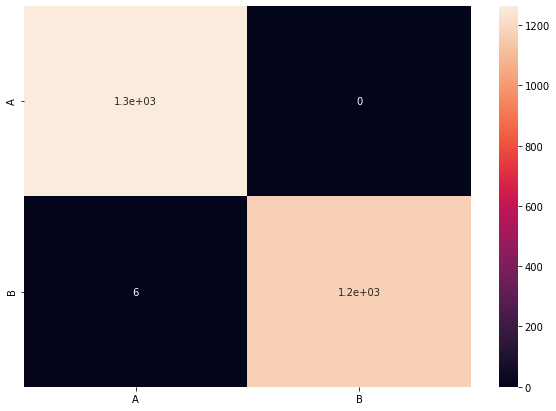

<matplotlib.axes._subplots.AxesSubplot at 0x7f79c766ac50>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

#Creating a confusion matrix
df_cm = pd.DataFrame(array, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

#from this heat map we can see that the model predicts the edible nature of the mushrooms with 99% accuracy. This shows that the logistic regression model is higly effcient at predicting given the following features

In [0]:
#Using Decision Trees classification model to classify potentially poisonous mushrooms

from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier().setMaxDepth(4).setMaxBins(30).setFeaturesCol("features_scaled").setLabelCol("classInd")
dtModel = dt.fit(assembler_train_df)

dtTest = dtModel.transform(assembler_test_df)
dtTest.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[12]:

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,features,features_scaled,classInd,rawPrediction,probability,prediction
0,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.0,"[370.0, 0.0]","[1.0, 0.0]",0.0
1,p,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1.0,"[33.0, 2623.0]","[0.012424698795180723, 0.9875753012048193]",1.0
2,p,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"[33.0, 2623.0]","[0.012424698795180723, 0.9875753012048193]",1.0
3,e,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0.0,"[2345.0, 3.0]","[0.9987223168654173, 0.0012776831345826234]",0.0
4,e,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.0,"[2345.0, 3.0]","[0.9987223168654173, 0.0012776831345826234]",0.0


In [0]:
result = dtTest.groupBy("prediction").count().show()
truth = dtTest.groupBy("classInd").count().show()

#the area under the ROC curve
print(summary.areaUnderROC)
# the f measure by threshold, the precision, the recall, the recall by thresholds, and the ROC curve
summary.roc.show()
summary.pr.show()
#The speed at which the model descends to the final result
summary.objectiveHistory

from sklearn.metrics import classification_report, confusion_matrix
y_true = dtTest.select(["classInd"]).collect()
y_pred = dtTest.select(["prediction"]).collect()

print(classification_report(y_true, y_pred))
array = confusion_matrix(y_true, y_pred)
print(array)

+----------+-----+
prediction|count|
+----------+-----+
 0.0| 1248|
 1.0| 1190|
+----------+-----+

+--------+-----+
classInd|count|
+--------+-----+
 0.0| 1262|
 1.0| 1176|
+--------+-----+

0.9999256693475256
+---+-------------------+
FPR| TPR|
+---+-------------------+
0.0| 0.0|
0.0|0.03868613138686131|
0.0|0.07481751824817519|
0.0|0.11094890510948906|
0.0|0.14562043795620438|
0.0|0.22043795620437956|
0.0| 0.2937956204379562|
0.0| 0.6251824817518248|
0.0| 0.6952554744525548|
0.0| 0.7671532846715329|
0.0| 0.8|
0.0| 0.8127737226277372|
0.0| 0.8492700729927007|
0.0| 0.8864963503649635|
0.0| 0.9208029197080292|
0.0| 0.9317518248175183|
0.0| 0.9448905109489051|
0.0| 0.9572992700729926|
0.0| 0.9678832116788321|
0.0| 0.9864963503649635|
+---+-------------------+
only showing top 20 rows

+-------------------+---------+
 recall|precision|
+-------------------+---------+
 0.0| 1.0|
0.03868613138686131| 1.0|
0.07481751824817519| 1.0|
0.11094890510948906| 1.0|
0.14562043795620438| 1.0|
0.22043795620437956| 1.0|
 0.2937956204379562| 1.0|
 0.6251824817518248| 1.0|
 0.6952554744525548| 1.0|
 0.7671532846715329| 1.0|
 0.8| 1.0|
 0.8127737226277372| 1.0|
 0.8492700729927007| 1.0|
 0.8864963503649635| 1.0|
 0.9208029197080292| 1.0|
 0.9317518248175183| 1.0|
 0.9448905109489051| 1.0|
 0.9572992700729926| 1.0|
 0.9678832116788321| 1.0|
 0.9864963503649635| 1.0|
+-------------------+---------+
only showing top 20 rows

 precision recall f1-score support

 0.0 1.00 0.99 0.99 1262
 1.0 0.99 1.00 0.99 1176

 accuracy 0.99 2438
 macro avg 0.99 0.99 0.99 2438
weighted avg 0.99 0.99 0.99 2438

[[1247 15]
 [ 1 1175]]

Out[14]:

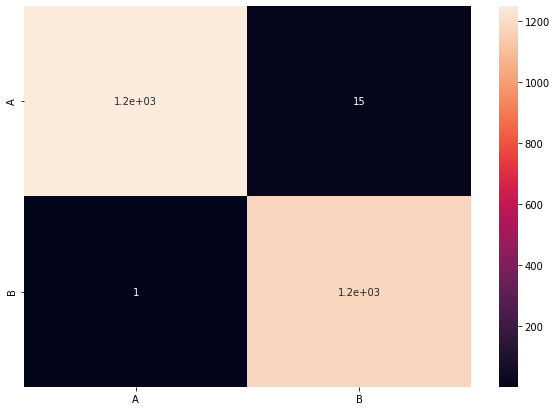

<matplotlib.axes._subplots.AxesSubplot at 0x7f799c957b10>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

#Creating a confusion matrix
df_cm = pd.DataFrame(array, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# The Decision Tree model seems to work slightly less effectively than the Logistic regression model. Its important to note that this model results in a large number of false positives in comparison to false negatives. this influx of Type II error is essential to note since Type I error is far more dangerous that Type I error with this particular dataset since the false prediction of a mushroom to be edible when it is in reality poisonous could lead to lethal results to anyone who consumes the mushroom based on the prediction. 

In [0]:
# Using the Random Forest Classifier to predict whether a mushroom is poisonous or not
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier().setNumTrees(20).setFeatureSubsetStrategy("auto").setFeaturesCol("features_scaled").setLabelCol("classInd")

rfModel = rf.fit(assembler_train_df)

rfTest = rfModel.transform(assembler_test_df)
rfTest.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[15]:

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,features,features_scaled,classInd,rawPrediction,probability,prediction
0,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.0,"[18.47857305333067, 1.5214269466693247]","[0.9239286526665337, 0.07607134733346625]",0.0
1,p,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1.0,"[0.05266491437360979, 19.947335085626392]","[0.002633245718680489, 0.9973667542813194]",1.0
2,p,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"[0.30088050788107135, 19.699119492118932]","[0.015044025394053565, 0.9849559746059464]",1.0
3,e,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0.0,"[19.10929998519419, 0.8907000148058107]","[0.9554649992597094, 0.04453500074029053]",0.0
4,e,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.0,"[19.493069237375675, 0.5069307626243273]","[0.9746534618687835, 0.025346538131216362]",0.0


In [0]:
result = rfTest.groupBy("prediction").count().show()
truth = rfTest.groupBy("classInd").count().show()

#the area under the ROC curve
print(summary.areaUnderROC)
# the f measure by threshold, the precision, the recall, the recall by thresholds, and the ROC curve
summary.roc.show()
summary.pr.show()
#The speed at which the model descends to the final result
summary.objectiveHistory

from sklearn.metrics import classification_report, confusion_matrix
y_true = rfTest.select(["classInd"]).collect()
y_pred = rfTest.select(["prediction"]).collect()

print(classification_report(y_true, y_pred))
array = confusion_matrix(y_true, y_pred)
print(array)

+----------+-----+
prediction|count|
+----------+-----+
 0.0| 1283|
 1.0| 1155|
+----------+-----+

+--------+-----+
classInd|count|
+--------+-----+
 0.0| 1262|
 1.0| 1176|
+--------+-----+

0.9999256693475256
+---+-------------------+
FPR| TPR|
+---+-------------------+
0.0| 0.0|
0.0|0.03868613138686131|
0.0|0.07481751824817519|
0.0|0.11094890510948906|
0.0|0.14562043795620438|
0.0|0.22043795620437956|
0.0| 0.2937956204379562|
0.0| 0.6251824817518248|
0.0| 0.6952554744525548|
0.0| 0.7671532846715329|
0.0| 0.8|
0.0| 0.8127737226277372|
0.0| 0.8492700729927007|
0.0| 0.8864963503649635|
0.0| 0.9208029197080292|
0.0| 0.9317518248175183|
0.0| 0.9448905109489051|
0.0| 0.9572992700729926|
0.0| 0.9678832116788321|
0.0| 0.9864963503649635|
+---+-------------------+
only showing top 20 rows

+-------------------+---------+
 recall|precision|
+-------------------+---------+
 0.0| 1.0|
0.03868613138686131| 1.0|
0.07481751824817519| 1.0|
0.11094890510948906| 1.0|
0.14562043795620438| 1.0|
0.22043795620437956| 1.0|
 0.2937956204379562| 1.0|
 0.6251824817518248| 1.0|
 0.6952554744525548| 1.0|
 0.7671532846715329| 1.0|
 0.8| 1.0|
 0.8127737226277372| 1.0|
 0.8492700729927007| 1.0|
 0.8864963503649635| 1.0|
 0.9208029197080292| 1.0|
 0.9317518248175183| 1.0|
 0.9448905109489051| 1.0|
 0.9572992700729926| 1.0|
 0.9678832116788321| 1.0|
 0.9864963503649635| 1.0|
+-------------------+---------+
only showing top 20 rows

 precision recall f1-score support

 0.0 0.98 1.00 0.99 1262
 1.0 1.00 0.98 0.99 1176

 accuracy 0.99 2438
 macro avg 0.99 0.99 0.99 2438
weighted avg 0.99 0.99 0.99 2438

[[1262 0]
 [ 21 1155]]

Out[17]:

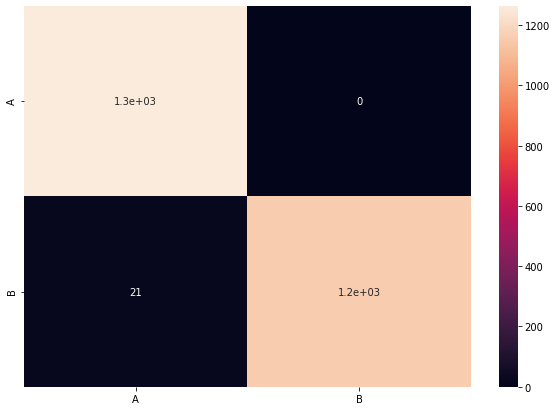

<matplotlib.axes._subplots.AxesSubplot at 0x7f799c6fc390>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

#Creating a confusion matrix
df_cm = pd.DataFrame(array, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# The Random Forest Classifier performs better than the decision tree model in the sense that it have no false negatives which is very vital to this particular dataset. The model does however, still perform worse than the logistic regression model by a small percentage

In [0]:
# Using Gradient boosted trees to predict whether a mushroom is poisonous or not

from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier().setFeaturesCol("features_scaled").setLabelCol("classInd")

gbtModel = gbt.fit(assembler_train_df)

gbtTest = gbtModel.transform(assembler_test_df)
gbtTest.toPandas().head()

/databricks/spark/python/pyspark/sql/pandas/conversion.py:93: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
 Unable to convert the field features. If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Context: Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
 warnings.warn(msg)
Out[18]:

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_f,bruises_t,odor_a,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_a,gill-attachment_f,gill-spacing_c,gill-spacing_w,gill-size_b,gill-size_n,gill-color_b,gill-color_e,...,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-number_n,ring-number_o,ring-number_t,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_a,population_c,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,features,features_scaled,classInd,rawPrediction,probability,prediction
0,e,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...",0.0,"[1.5435020027249837, -1.5435020027249837]","[0.9563534785727067, 0.043646521427293306]",0.0
1,p,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",1.0,"[-1.5435020027249846, 1.5435020027249846]","[0.04364652142729309, 0.9563534785727069]",1.0
2,p,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.0,"[-1.5435020027249846, 1.5435020027249846]","[0.04364652142729309, 0.9563534785727069]",1.0
3,e,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,"(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","(0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0.0,"[1.5453693701435807, -1.5453693701435807]","[0.9565091065896612, 0.04349089341033885]",0.0
4,e,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,1,...,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,"(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",0.0,"[1.5254239202041817, -1.5254239202041817]","[0.9548191160960062, 0.045180883903993774]",0.0


In [0]:
result = gbtTest.groupBy("prediction").count().show()
truth = gbtTest.groupBy("classInd").count().show()

#the area under the ROC curve
print(summary.areaUnderROC)
# the f measure by threshold, the precision, the recall, the recall by thresholds, and the ROC curve
summary.roc.show()
summary.pr.show()
#The speed at which the model descends to the final result
summary.objectiveHistory

from sklearn.metrics import classification_report, confusion_matrix
y_true = gbtTest.select(["classInd"]).collect()
y_pred = gbtTest.select(["prediction"]).collect()

print(classification_report(y_true, y_pred))
array = confusion_matrix(y_true, y_pred)
print(array)

+----------+-----+
prediction|count|
+----------+-----+
 0.0| 1263|
 1.0| 1175|
+----------+-----+

+--------+-----+
classInd|count|
+--------+-----+
 0.0| 1262|
 1.0| 1176|
+--------+-----+

0.9999256693475256
+---+-------------------+
FPR| TPR|
+---+-------------------+
0.0| 0.0|
0.0|0.03868613138686131|
0.0|0.07481751824817519|
0.0|0.11094890510948906|
0.0|0.14562043795620438|
0.0|0.22043795620437956|
0.0| 0.2937956204379562|
0.0| 0.6251824817518248|
0.0| 0.6952554744525548|
0.0| 0.7671532846715329|
0.0| 0.8|
0.0| 0.8127737226277372|
0.0| 0.8492700729927007|
0.0| 0.8864963503649635|
0.0| 0.9208029197080292|
0.0| 0.9317518248175183|
0.0| 0.9448905109489051|
0.0| 0.9572992700729926|
0.0| 0.9678832116788321|
0.0| 0.9864963503649635|
+---+-------------------+
only showing top 20 rows

+-------------------+---------+
 recall|precision|
+-------------------+---------+
 0.0| 1.0|
0.03868613138686131| 1.0|
0.07481751824817519| 1.0|
0.11094890510948906| 1.0|
0.14562043795620438| 1.0|
0.22043795620437956| 1.0|
 0.2937956204379562| 1.0|
 0.6251824817518248| 1.0|
 0.6952554744525548| 1.0|
 0.7671532846715329| 1.0|
 0.8| 1.0|
 0.8127737226277372| 1.0|
 0.8492700729927007| 1.0|
 0.8864963503649635| 1.0|
 0.9208029197080292| 1.0|
 0.9317518248175183| 1.0|
 0.9448905109489051| 1.0|
 0.9572992700729926| 1.0|
 0.9678832116788321| 1.0|
 0.9864963503649635| 1.0|
+-------------------+---------+
only showing top 20 rows

 precision recall f1-score support

 0.0 1.00 1.00 1.00 1262
 1.0 1.00 1.00 1.00 1176

 accuracy 1.00 2438
 macro avg 1.00 1.00 1.00 2438
weighted avg 1.00 1.00 1.00 2438

[[1262 0]
 [ 1 1175]]

Out[20]:

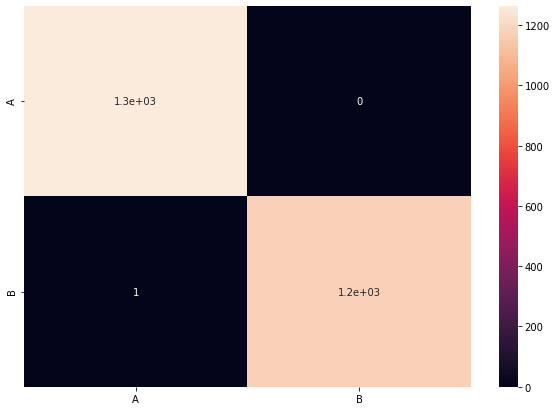

<matplotlib.axes._subplots.AxesSubplot at 0x7f7997a0fbd0>

In [0]:
import matplotlib.pyplot as plt
import seaborn as sn

#Creating a confusion matrix
df_cm = pd.DataFrame(array, index = [i for i in "AB"],
                  columns = [i for i in "AB"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# We can see through this heatmap that the gradient boosted tree works with 99.99% accuracy on this particular dataset. This hows that this model is most likely the best for predicting with this particular dataset.